# **EXPLORATORY DATA ANALYSIS**
A notebook to explore characteristics of the data

In [16]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import copy
import pandas as pd
import numpy as np
import os
PRJ_ROOT_DIR = os.path.dirname(os.path.abspath(''))

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

In [4]:
# Where to save the figures
NOTE_ROOT_DIR = os.path.abspath('')
CHAPTER_ID = "02_exploratory_data_analysis"
IMAGES_PATH = os.path.join(NOTE_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## **1 - Load the Data**

In [5]:
# Load EPL match data
df_match = pd.read_csv(os.path.join(PRJ_ROOT_DIR, "data", "tabular", "clean", "matches.csv"))
df_match.head()

,home/gk_0,home/df_0,home/df_1,home/df_2,home/df_3,home/df_4,home/mf_0,home/mf_1,home/mf_2,home/mf_3,...,away/mf_2,away/mf_3,away/mf_4,away/fw_0,away/fw_1,away/fw_2,home/name,away/name,home_result,season
0,37096.0,55459.0,166640.0,219924.0,81012.0,NaN,101537.0,57531.0,86934.0,54102.0,...,20664.0,NaN,NaN,103955.0,205651.0,103025.0,West Ham United,Manchester City,lose,2019/20
1,37915.0,38290.0,55605.0,173904.0,158534.0,NaN,157668.0,62974.0,45268.0,231372.0,...,85242.0,148508.0,193488.0,213345.0,NaN,NaN,Tottenham Hotspur,Aston Villa,win,2019/20
2,116535.0,171287.0,97032.0,122798.0,169187.0,NaN,116643.0,41733.0,56979.0,NaN,...,71738.0,90440.0,78607.0,57127.0,NaN,NaN,Liverpool,Norwich City,win,2019/20
3,98747.0,68983.0,17761.0,51927.0,39487.0,NaN,40145.0,60586.0,433154.0,60551.0,...,101178.0,213482.0,NaN,84939.0,200439.0,83283.0,Burnley,Southampton,win,2019/20
4,51940.0,184667.0,95658.0,106760.0,214590.0,NaN,74208.0,176297.0,109322.0,156689.0,...,88894.0,49579.0,184341.0,173879.0,NaN,NaN,Manchester United,Chelsea,win,2019/20


In [6]:
# Load EPL player data
df_player = pd.read_csv(os.path.join(PRJ_ROOT_DIR, "data", "tabular", "clean", "players.csv"))
df_player.head()

,defence/clean_sheets,defence/goals_conceded,defence/tackles,defence/tackle_success_%,defence/last_man_tackles,defence/blocked_shots,defence/interceptions,defence/clearances,defence/headed_clearance,defence/clearances_off_line,...,goalkeeping/goal_kicks,defence/recoveries,defence/duels_won,defence/duels_lost,teamplay/passes,teamplay/crosses,teamplay/accurate_long_balls,id,name,season
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,468236.0,Yan Couto,2021/22
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,447880.0,Josh Wilson-Esbrand,2021/22
2,0.0,0.0,12.0,50.0,0.0,6.0,8.0,5.0,4.0,0.0,...,0.0,58.0,73.0,71.0,273.0,11.0,5.0,216646.0,Yoane Wissa,2021/22
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,491556.0,Charlie Whitaker,2021/22
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,515503.0,Jack Wells-Morrison,2021/22


**NOTE:** The match data contains player IDs, which is not statistical. Therefore, the notebook will mostly exploit the player data.

## **2 - EPL Player**

### **2.1 - Univariate Analysis**

Saving figure players_by_season


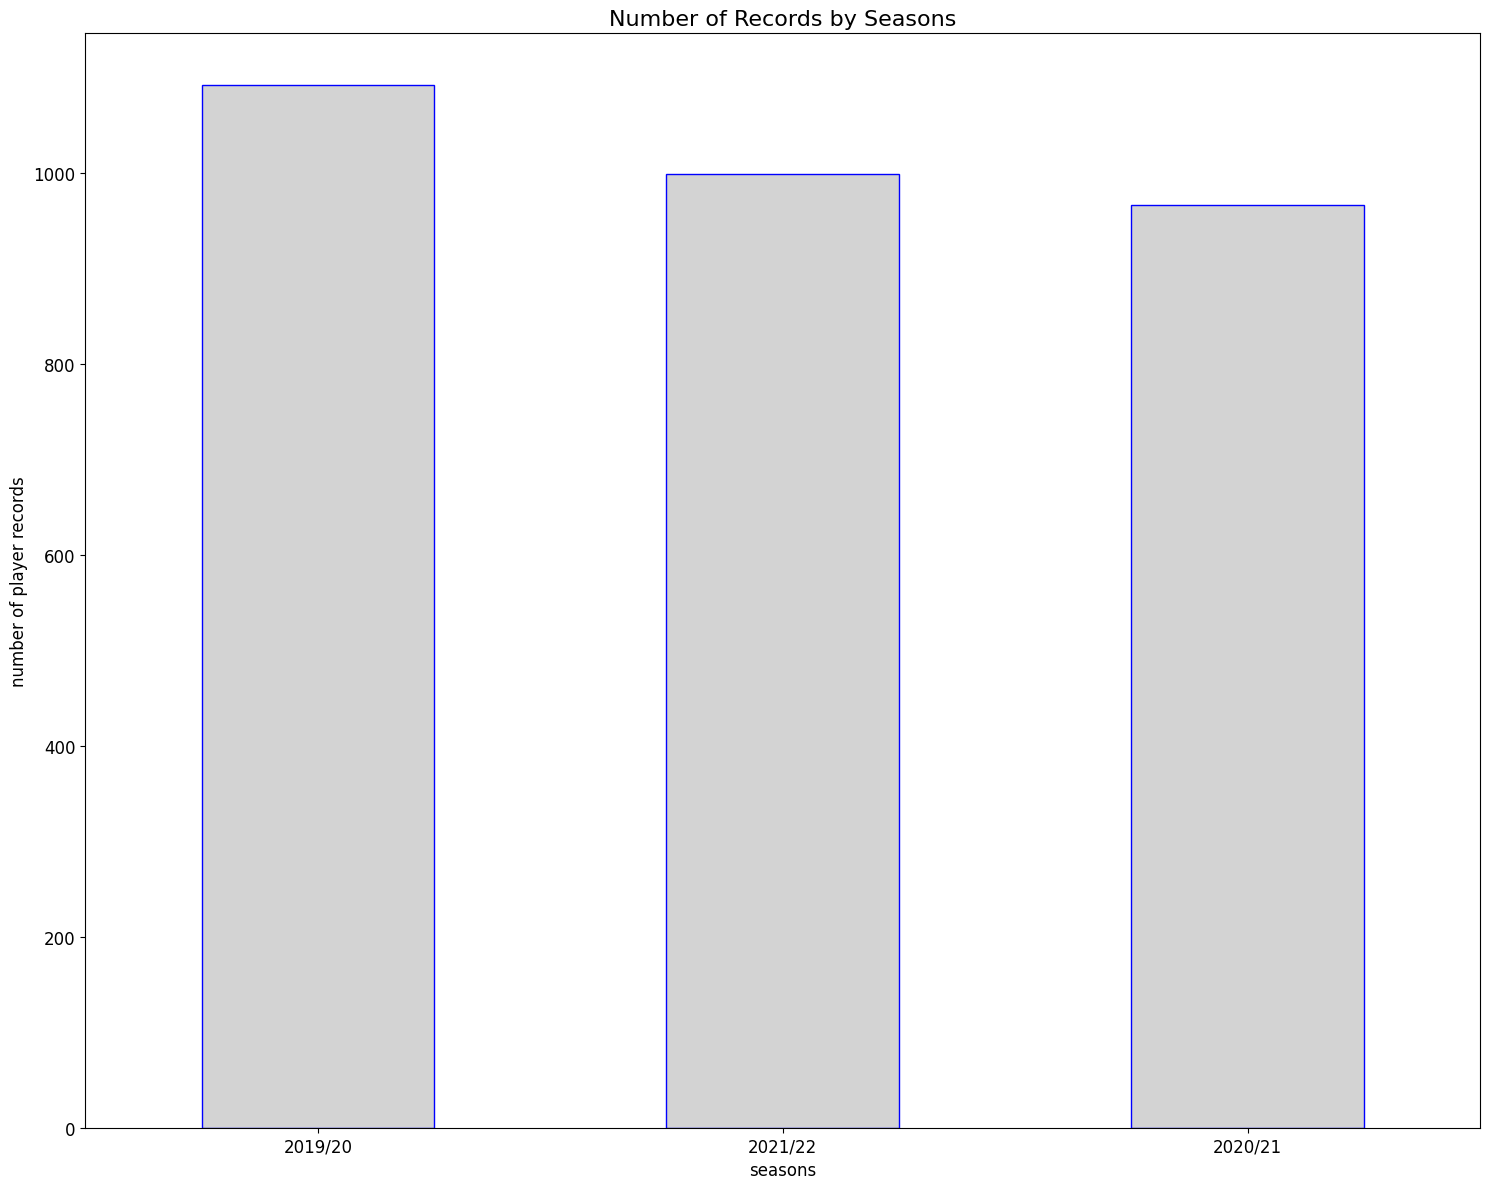

In [5]:
# Number of player records for each season
ax = df_player['season'].value_counts().plot(kind='bar', figsize=(15, 12), 
                                             color="#D3D3D3", edgecolor='blue')

ax.set_title('Number of Records by Seasons', size=16)
ax.set_xlabel('seasons', size=12)
ax.set_ylabel('number of player records', size=12)
plt.xticks(rotation=0)
save_fig("players_by_season")

In [6]:
# Statistics of player performance
df_player.iloc[:, :-3].describe()

,defence/clean_sheets,defence/goals_conceded,defence/tackles,defence/tackle_success_%,defence/last_man_tackles,defence/blocked_shots,defence/interceptions,defence/clearances,defence/headed_clearance,defence/clearances_off_line,...,goalkeeping/catches,goalkeeping/sweeper_clearances,goalkeeping/throw_outs,goalkeeping/goal_kicks,defence/recoveries,defence/duels_won,defence/duels_lost,teamplay/passes,teamplay/crosses,teamplay/accurate_long_balls
count,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,...,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000
mean,1.011445,5.318509,12.274689,19.432309,0.036298,2.662198,7.807717,13.717462,7.246893,0.049379,...,0.133094,0.293002,3.535317,5.546436,33.812296,30.277632,27.428058,353.951929,14.361347,18.799869
std,2.857000,13.408723,21.738711,28.817012,0.226601,5.831514,14.744525,30.076426,16.336387,0.293615,...,0.997680,2.258084,24.434425,37.007987,66.822700,59.475181,55.729083,599.810726,41.232396,45.278658
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
75%,0.000000,0.000000,18.000000,50.000000,0.000000,3.000000,10.000000,13.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,43.000000,40.000000,36.000000,570.000000,8.000000,16.000000
max,30.000000,178.000000,390.000000,100.000000,3.000000,102.000000,228.000000,367.000000,190.000000,5.000000,...,21.000000,56.000000,559.000000,821.000000,1131.000000,1070.000000,1130.000000,11873.000000,1118.000000,718.000000


**CAUTION:** Some features are mostly zero (e.g. `defence_clean sheets`), which shows redundancy and sparsity.

Saving figure player_histogram_plots


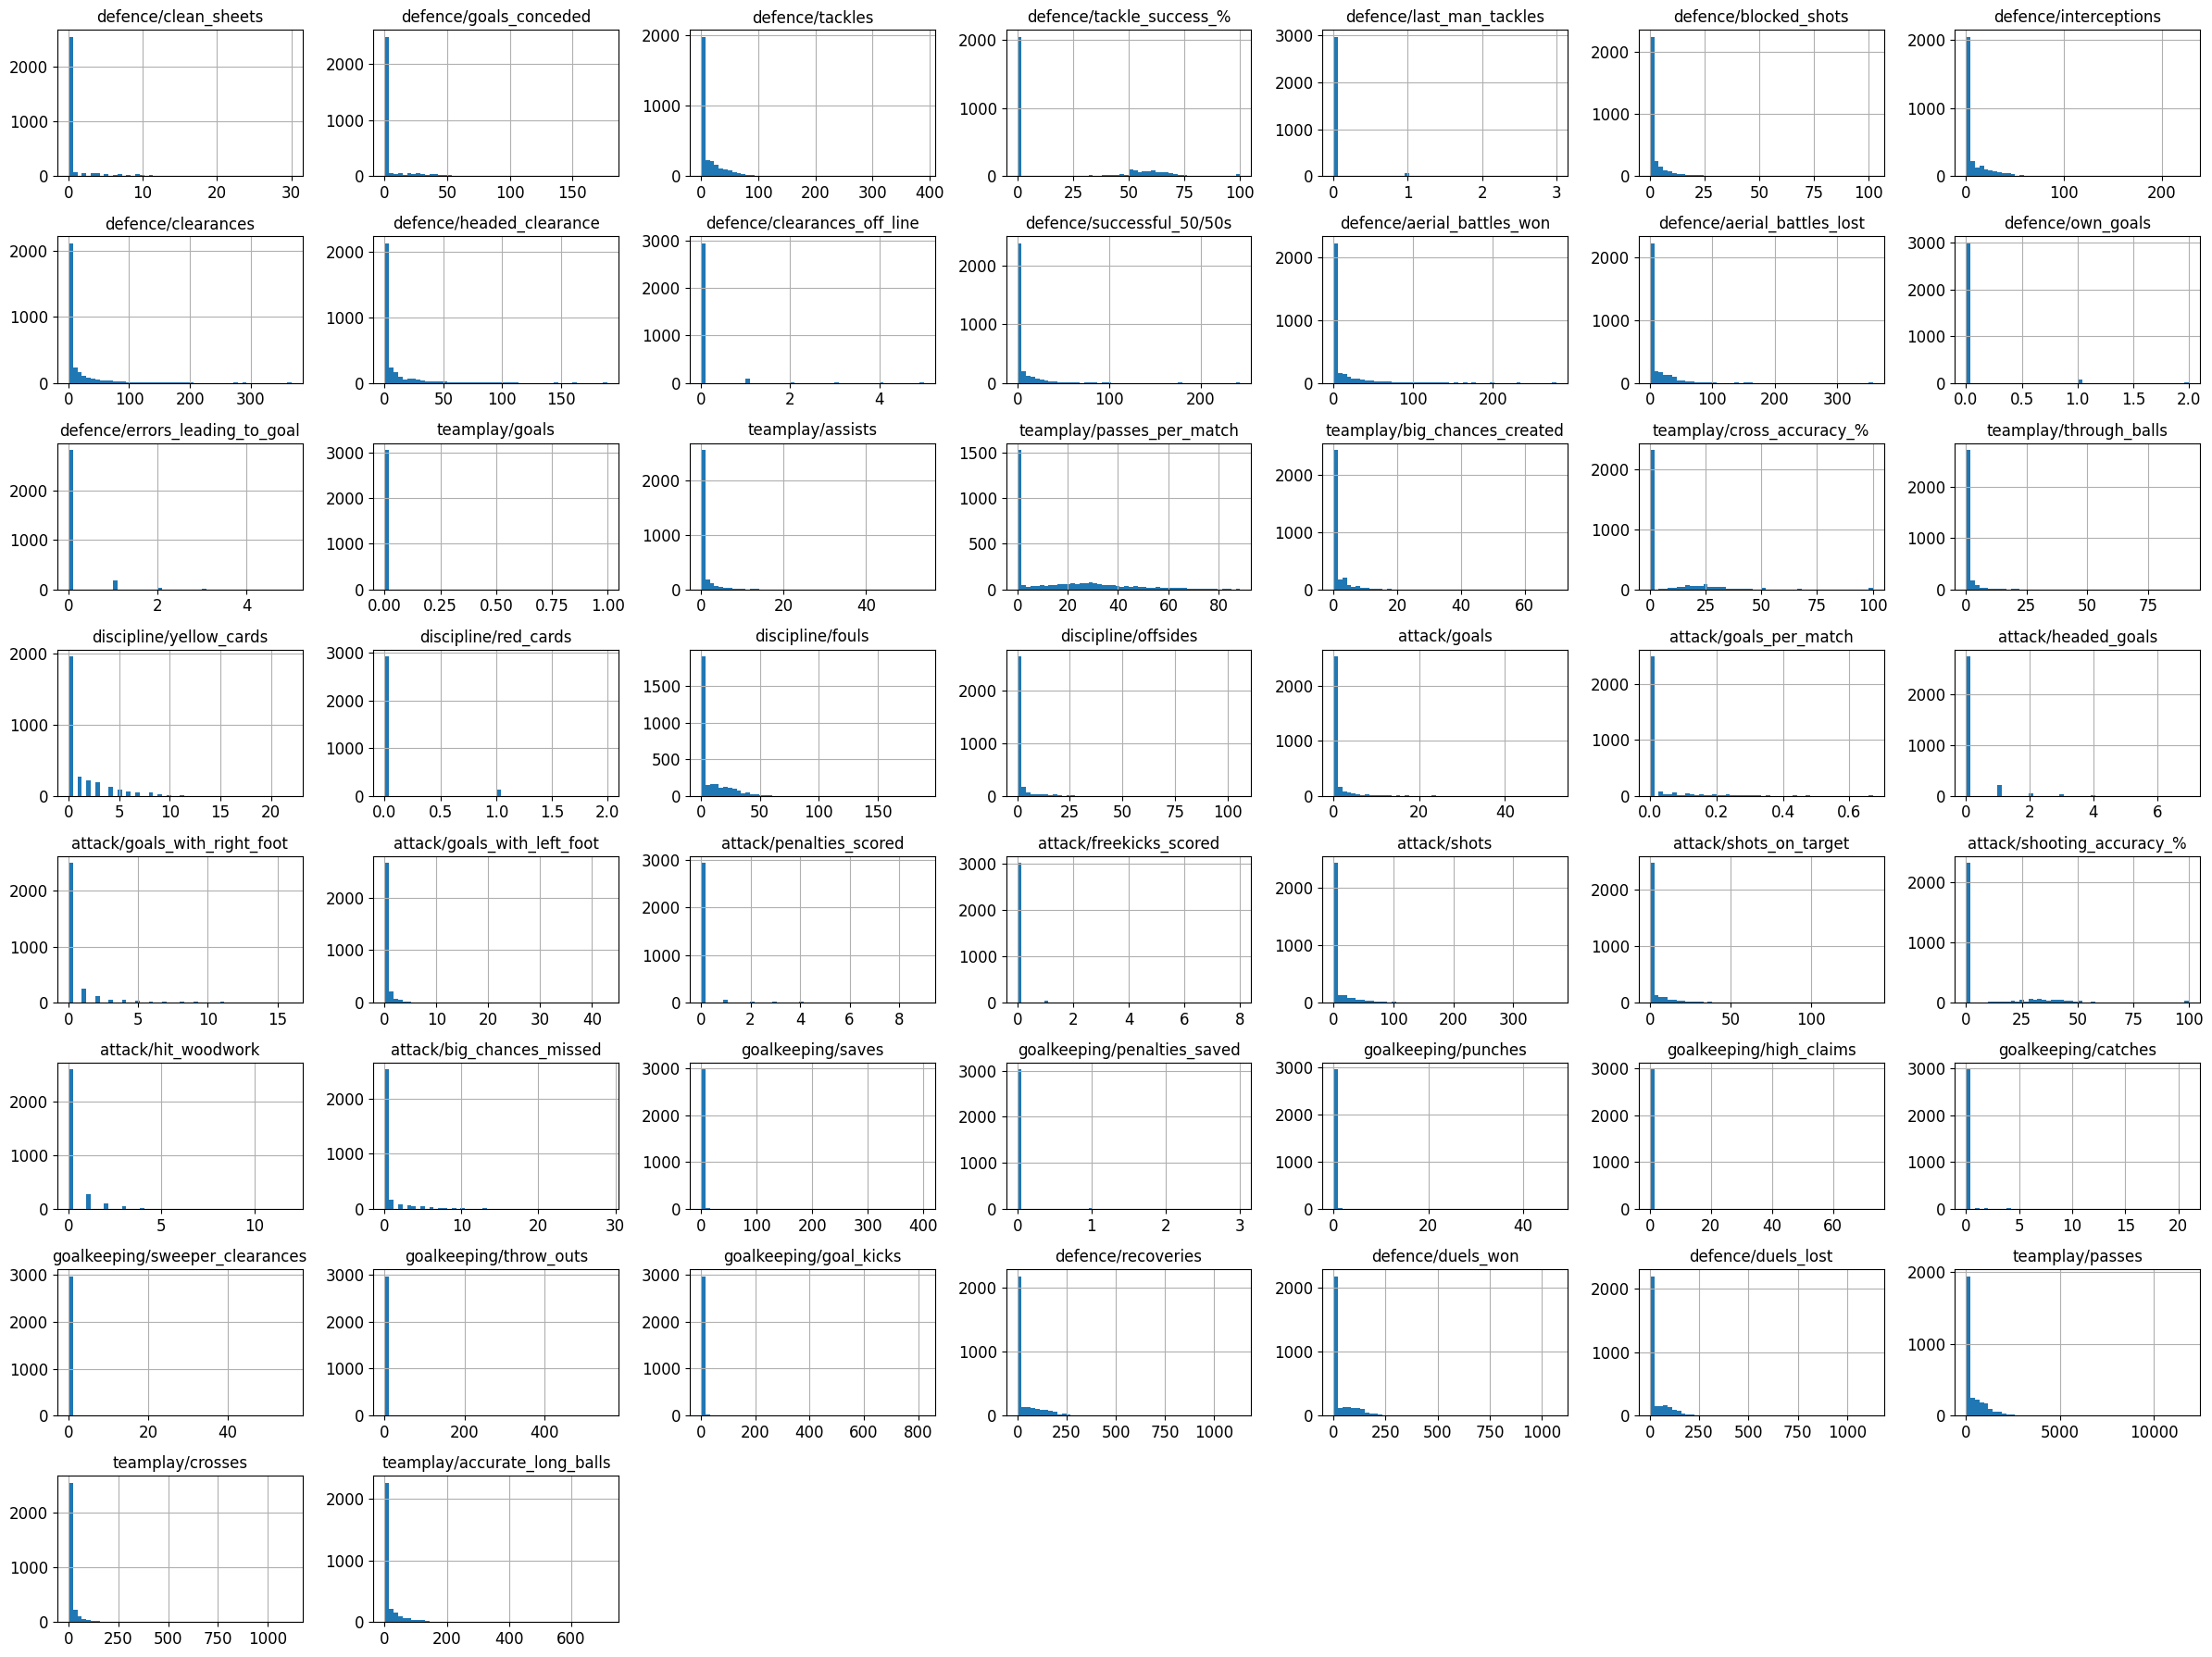

In [7]:
# Histogram of numerical variables
df_player.iloc[:, :-3].hist(bins=50, figsize=(24, 18))
plt.tight_layout()
save_fig("player_histogram_plots")

**CAUTION:** The data is heavily skew to the left-hand side and many features has the mode 0.0. The range of features varies critically and some have very extreme outliers compared to their crowd (surrounding 0.0). 

### **2.2 - Multivariate Analysis**

Saving figure player_performance_correlation


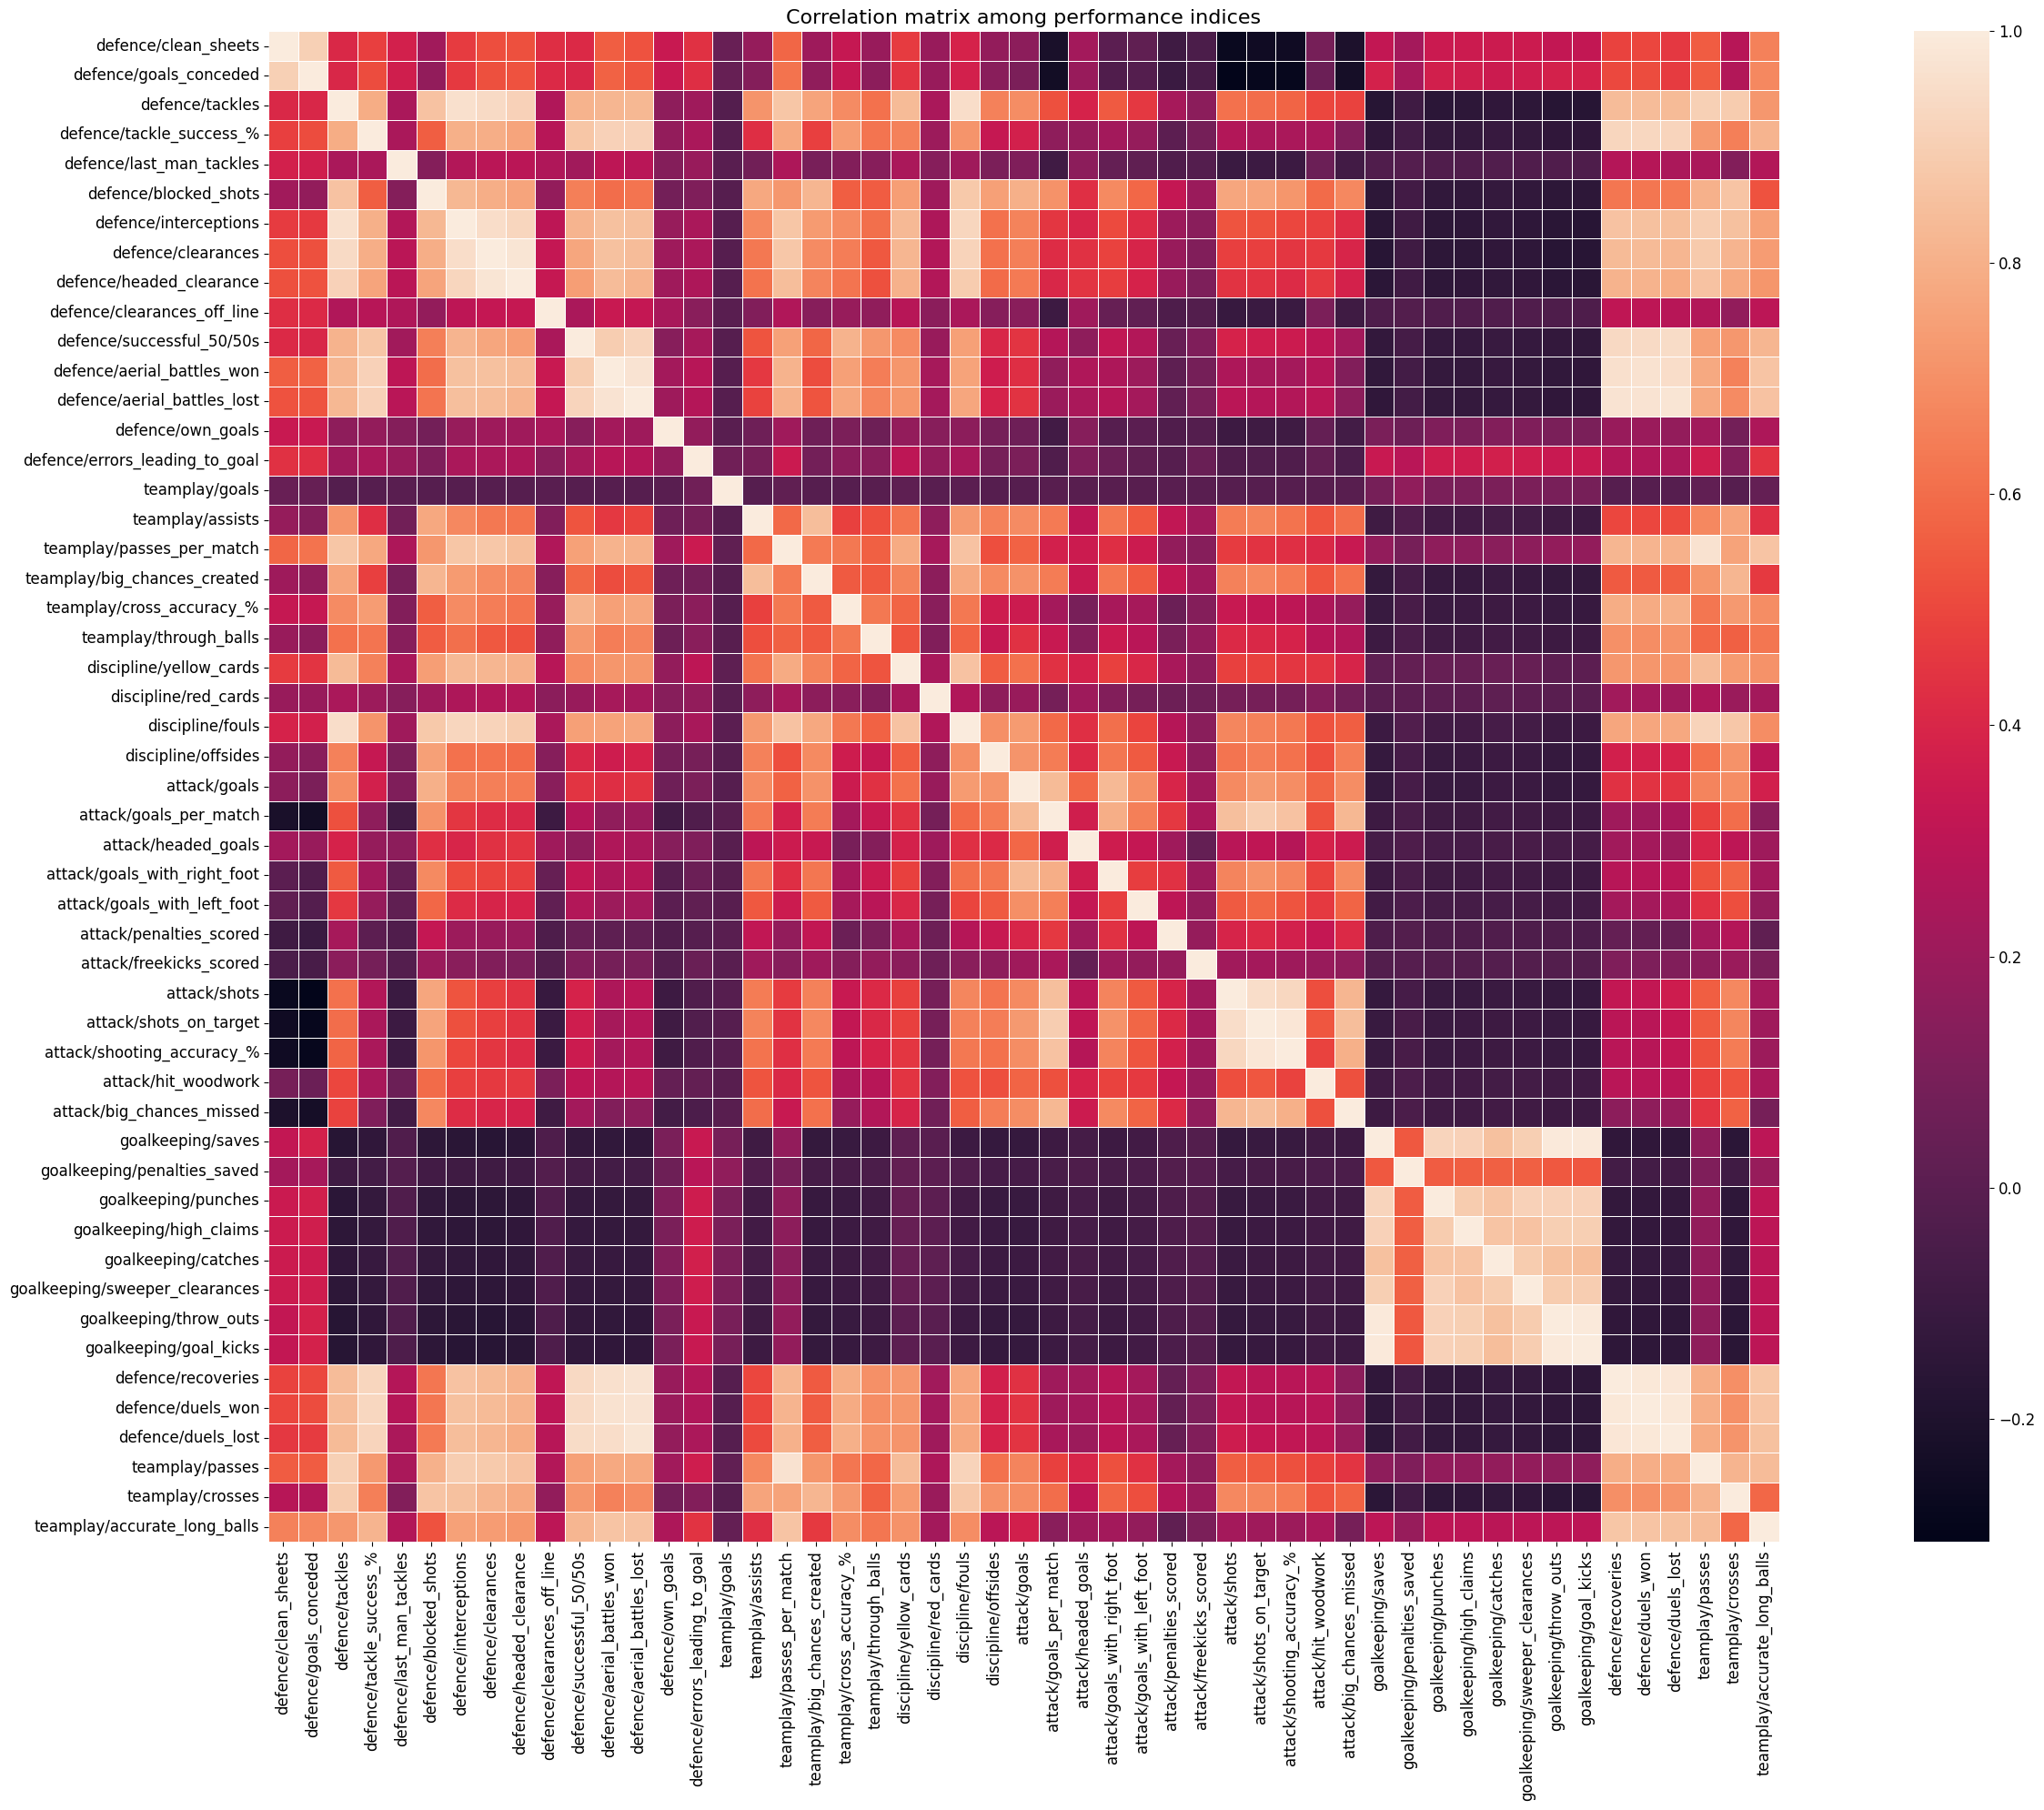

In [8]:
# Correlation among performance indices of players
corr_mat = df_player.iloc[:, :-3].corr(method="spearman")

plt.figure(figsize=(30, 20))
sns.heatmap(corr_mat, square=True, annot=False, linewidths=.5)
plt.title("Correlation matrix among performance indices", size=16)
plt.tight_layout()
save_fig("player_performance_correlation")

In [9]:
# Get the most correlated pairs of indices
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

tri_corr_mat = corr_mat.unstack()
cells_to_drop = get_redundant_pairs(df_player.iloc[:, :-3])
tri_corr_mat = tri_corr_mat.drop(labels=cells_to_drop).sort_values(ascending=False)

print("Top 10 positive correlated feature pairs:\n" + str(tri_corr_mat[0:10]))
print("\n----------------------------------------------------------------")
print("\nTop 10 negative correlated feature pairs:\n"+ str(tri_corr_mat[-10:]))
print("\n----------------------------------------------------------------")
print("\nTop 10 feature pairs:\n" + str(tri_corr_mat.abs().sort_values(ascending=False)[:10]))

Top 10 positive correlated feature pairs:
goalkeeping/saves            goalkeeping/goal_kicks        0.991981
goalkeeping/throw_outs       goalkeeping/goal_kicks        0.991875
goalkeeping/saves            goalkeeping/throw_outs        0.991727
defence/duels_won            defence/duels_lost            0.987385
defence/recoveries           defence/duels_won             0.987349
                             defence/duels_lost            0.984573
attack/shots_on_target       attack/shooting_accuracy_%    0.983887
defence/clearances           defence/headed_clearance      0.976819
defence/aerial_battles_lost  defence/duels_lost            0.974581
                             defence/duels_won             0.973968
dtype: float64

----------------------------------------------------------------

Top 10 negative correlated feature pairs:
defence/clean_sheets    attack/big_chances_missed    -0.205801
                        attack/goals_per_match       -0.215289
defence/goals_conceded  atta

In [10]:
# Percentage of feature pairs having a strong correlation 
tri_corr_mat_pos = tri_corr_mat.abs().sort_values(ascending=False)
len(tri_corr_mat_pos[tri_corr_mat_pos > 0.40]) / len(tri_corr_mat_pos)

0.36941176470588233

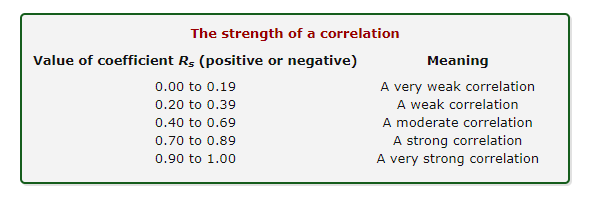

**NOTE:** There are approx. 37% feature pairs correlating more than 0.4. Hence, we reduce the dimensionality of the data to transform the variables and extract only the significant information for each position (goalkeeper/forward/midfielder/defender).

### **2.3 - Dimensionality Reduction**
This section is also to eliminate the redundancy of the data, which has been not done in `01_data_cleaning`. Moreover, there will be a specific notebook researching deeper about dimensionality reduction for player data later (`02.5_dimensionality_reduction`).

In [11]:
# Import & setup transformers
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df_player.iloc[:, :-3]
X.head()

,defence/clean_sheets,defence/goals_conceded,defence/tackles,defence/tackle_success_%,defence/last_man_tackles,defence/blocked_shots,defence/interceptions,defence/clearances,defence/headed_clearance,defence/clearances_off_line,...,goalkeeping/catches,goalkeeping/sweeper_clearances,goalkeeping/throw_outs,goalkeeping/goal_kicks,defence/recoveries,defence/duels_won,defence/duels_lost,teamplay/passes,teamplay/crosses,teamplay/accurate_long_balls
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,12.0,50.0,0.0,6.0,8.0,5.0,4.0,0.0,...,0.0,0.0,0.0,0.0,58.0,73.0,71.0,273.0,11.0,5.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Saving figure explained_variance_plot


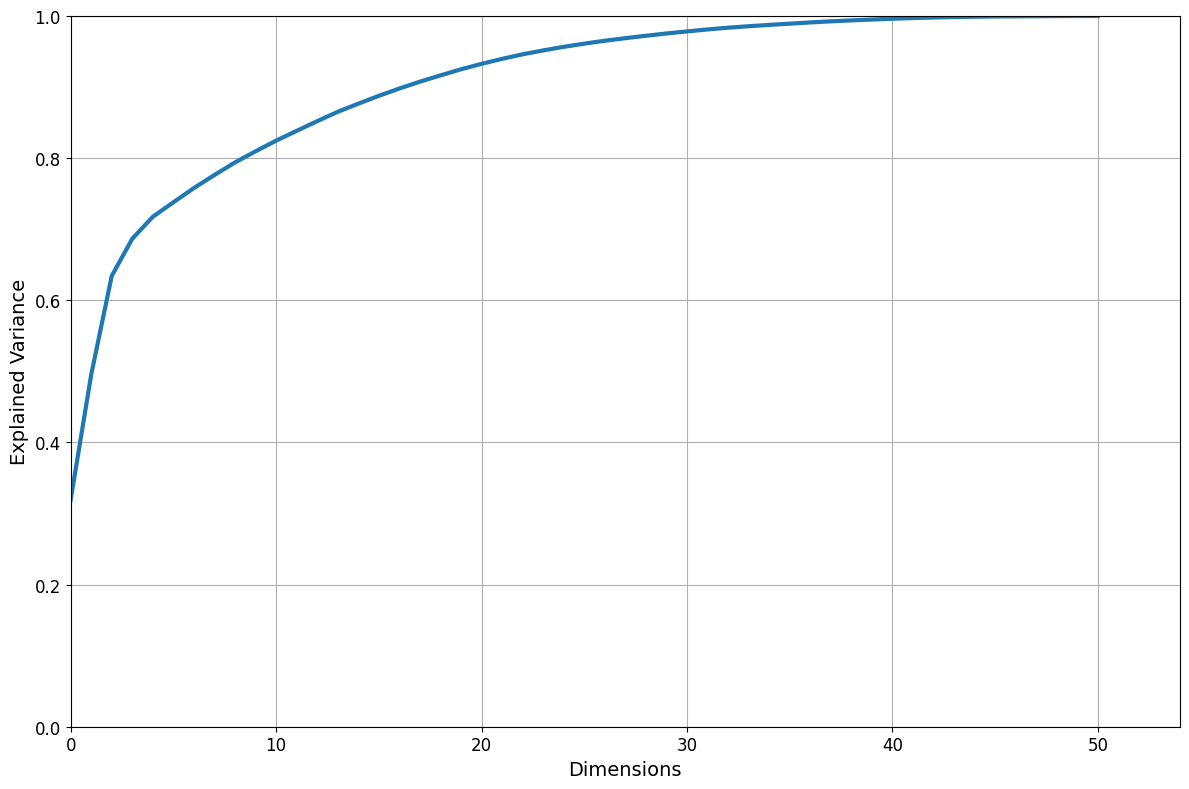

In [12]:
# Explained variance ratio on the number of dimensions
dim_reduce_observe = Pipeline([
    ("scaler", StandardScaler()),
    ("dim_reductor", PCA())
])

dim_reduce_observe.fit(X)
cumsum = np.cumsum(dim_reduce_observe["dim_reductor"].explained_variance_ratio_)

plt.figure(figsize=(12, 8))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 54, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")

plt.grid(True)
save_fig("explained_variance_plot")

In [13]:
# The elbow is on 4 PCs (principal components) (~70% preserved)
dim_reduce_elbow = Pipeline([
    ("scaler", StandardScaler()),
    ("dim_reductor", PCA(n_components=4))
])
X_reduced_elbow = dim_reduce_elbow.fit_transform(X)
np.sum(dim_reduce_elbow["dim_reductor"].explained_variance_ratio_)

0.6865948844622942

**CAUTION:** Despite 4 PCs being the elbow, PCA just drops too much information on this level (nearly half of information).

In [14]:
# Function to extract variables relevant to a PC
def feat_pc(axes, feats, n):
    ind = np.argsort(abs(axes[n]))[:]
    df = pd.DataFrame()
    df['variables'] = feats[ind][::-1]
    df['coef.'] = axes[n][ind][::-1]
    df['percentage'] = 100 * np.square(df['coef.'])
    return df

def feats_pc(axes, feats, n, stat="percentage"):
    df = feat_pc(axes, feats, n)
    skill_grps = ["attack", "defence", "teamplay", "discipline", "goalkeeping"]
    grp_percent = {}
    for skill in skill_grps:
        grp_percent[skill] = df[df["variables"].str.startswith(skill)][stat].sum()
    return df, grp_percent

#### Preserve 95% of Information

In [15]:
# Compute the minimum number of dimensions required to preserve 95% information
dim_reduce_95 = Pipeline([
    ("scaler", StandardScaler()),
    ("dim_reductor", PCA(n_components=0.95))
]) # preserve 95% information

X_reduced_95 = dim_reduce_95.fit_transform(X)
d = dim_reduce_95["dim_reductor"].n_components_
d

24

In [16]:
dim_reduce_95["dim_reductor"].components_

array([[ 0.09674848,  0.09773736,  0.21295937, ...,  0.22328418,
         0.16964765,  0.13778882],
       [ 0.23754473,  0.25024428,  0.03734346, ...,  0.09398932,
        -0.05288166,  0.22476444],
       [ 0.00422314, -0.00548272, -0.091325  , ..., -0.00897828,
         0.03642691,  0.09819437],
       ...,
       [-0.00169585,  0.01037271,  0.19018025, ..., -0.02853792,
         0.35667792, -0.09565545],
       [-0.03311252,  0.04402341, -0.02019965, ..., -0.05176979,
         0.04877309, -0.05607776],
       [-0.4941438 , -0.08947202, -0.09391252, ..., -0.14263848,
         0.02522752, -0.00424124]])

In [17]:
# Significant features for each PC
feats = X.columns
axes = dim_reduce_95["dim_reductor"].components_ # change explained_variance_ratio if necessary

feat_percent_pcs = []
for i in range(dim_reduce_95["dim_reductor"].n_components_):
    pc, feat_percent_pc = feats_pc(axes, feats, i)
    feat_percent_pcs.append(feat_percent_pc)

df_feat_percent_pc = pd.DataFrame.from_records(feat_percent_pcs)
df_feat_percent_pc.iloc[df_feat_percent_pc.idxmax(), :]

,attack,defence,teamplay,discipline,goalkeeping
18,73.982708,15.335281,7.175765,3.066969,0.439277
8,1.767565,87.948065,6.350099,3.579535,0.354736
6,7.260360,13.107760,74.386371,2.272490,2.973019
7,6.231148,17.950586,1.845017,73.800671,0.172578
11,1.457117,10.625710,1.015231,0.350746,86.551196


**NOTE:** 5 PCs could be a representative for each role (e.g., $22^{th}$ PC represents the attack ability of a player).

In [18]:
# Relationships of PCs to skill groups
feat_coef_pcs = []
for i in range(dim_reduce_95["dim_reductor"].n_components_):
    _, feat_coef_pc = feats_pc(axes, feats, i, "coef.")
    feat_coef_pcs.append(feat_coef_pc)

df_feat_coef_pc = pd.DataFrame.from_records(feat_coef_pcs)
df_feat_coef_pc.iloc[[22, 8, 6, 7, 12], :]

,attack,defence,teamplay,discipline,goalkeeping
22,-0.069744,0.196362,-0.138254,0.262981,0.087196
8,0.022465,-0.226452,-0.152276,0.248896,-0.051246
6,0.218086,-0.122977,1.399210,-0.033826,-0.248776
7,-0.056652,-0.307512,-0.298641,0.992916,-0.007484
12,0.803380,0.268647,-0.408099,-0.174753,-0.027732


#### Traceback Players' Role

In [19]:
# Assign role for players from the match data
df_player_pos = copy.deepcopy(df_player)
df_player_pos["position"] = np.nan
for id in df_player["id"].unique():
    for column in df_match.iloc[:, :-4].columns:
        if id in df_match[column].unique():
            df_player_pos.loc[df_player_pos["id"] == id, "position"] = column.split("/")[-1].split("_")[0]
            break
df_player_pos.head()

,defence/clean_sheets,defence/goals_conceded,defence/tackles,defence/tackle_success_%,defence/last_man_tackles,defence/blocked_shots,defence/interceptions,defence/clearances,defence/headed_clearance,defence/clearances_off_line,...,defence/recoveries,defence/duels_won,defence/duels_lost,teamplay/passes,teamplay/crosses,teamplay/accurate_long_balls,id,name,season,position
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,468236.0,Yan Couto,2021/22,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,447880.0,Josh Wilson-Esbrand,2021/22,NaN
2,0.0,0.0,12.0,50.0,0.0,6.0,8.0,5.0,4.0,0.0,...,58.0,73.0,71.0,273.0,11.0,5.0,216646.0,Yoane Wissa,2021/22,fw
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,491556.0,Charlie Whitaker,2021/22,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,515503.0,Jack Wells-Morrison,2021/22,NaN


## **3 - EPL Match**

Saving figure match_home_results_by_seasons


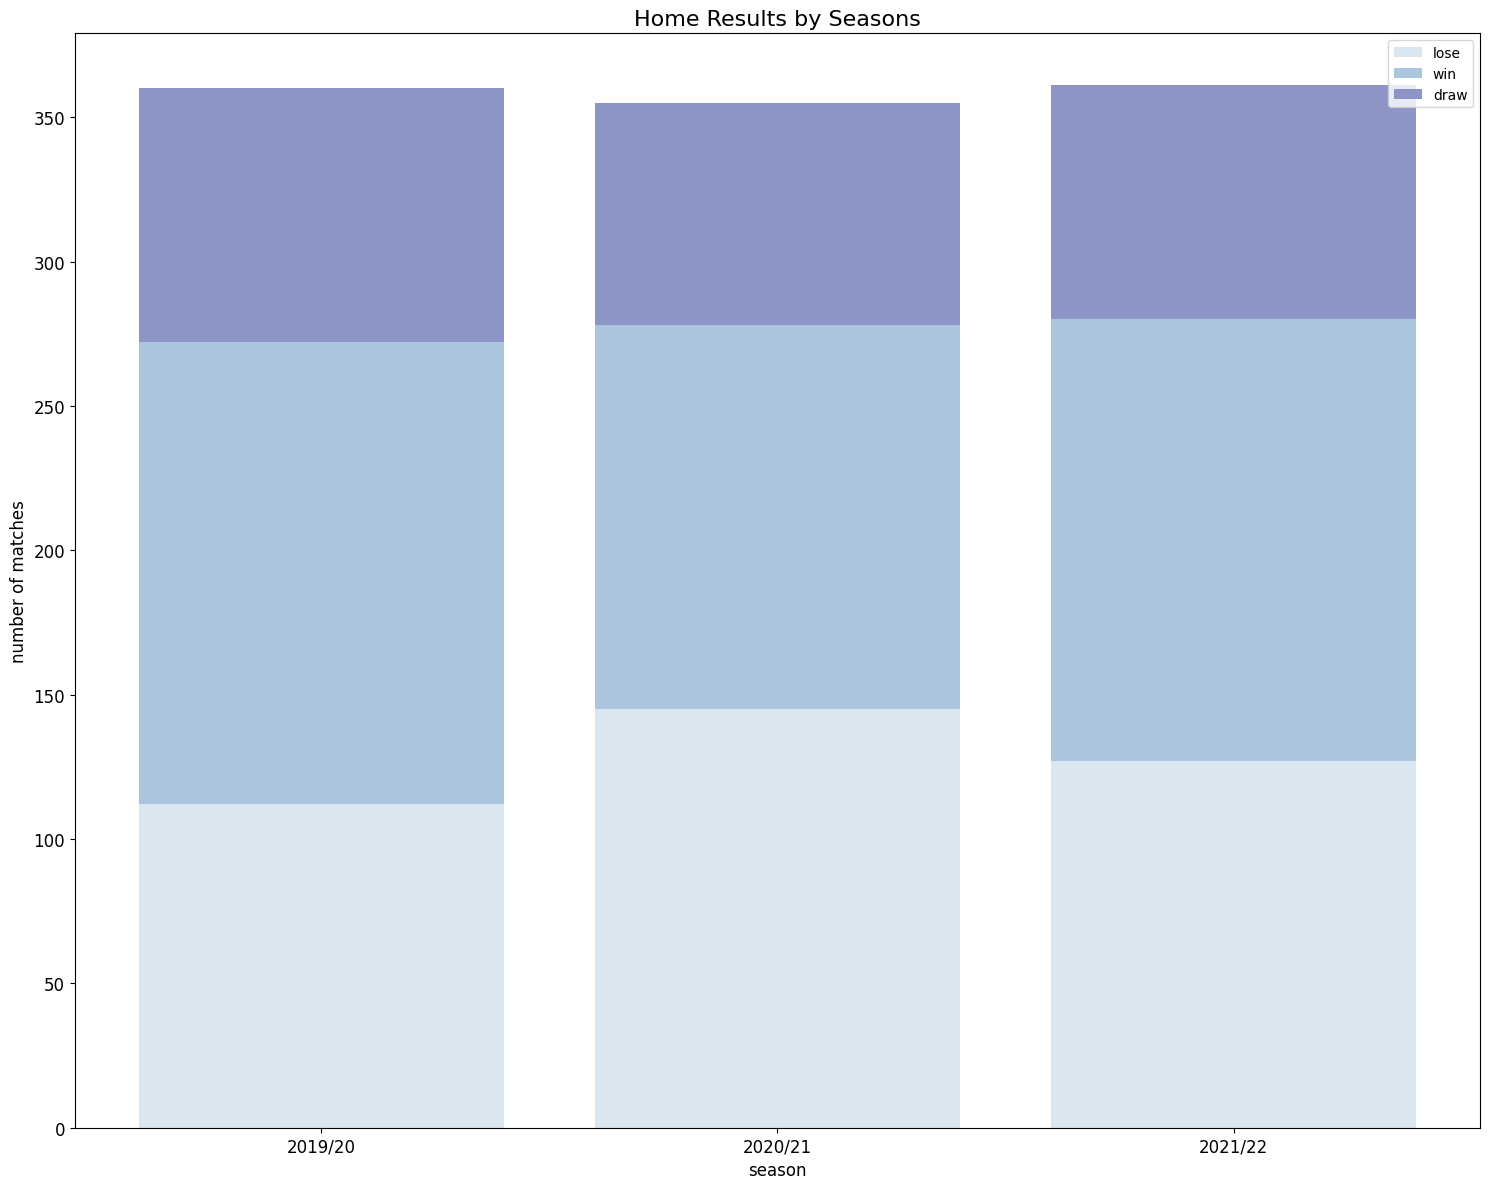

In [22]:
# Home results by each season
seasons = df_match['season'].unique()
home_results = df_match['home_result'].unique()

c = 0
colors = plt.cm.BuPu(np.linspace(0.15, 0.5, len(home_results)))
plt.figure(figsize=(15, 12))

y_bottom = np.array([0] * len(seasons))
for home_result in home_results:
    home_result_count = df_match[df_match['home_result'] == home_result]['season'].value_counts(sort=False)
    plt.bar(seasons, home_result_count, bottom=y_bottom, color=colors[c])

    y_bottom = y_bottom + np.array(home_result_count)
    c += 1

plt.xlabel('season', size=12)
plt.ylabel('number of matches', size=12)
plt.title('Home Results by Seasons', size=16)
plt.legend(home_results)
plt.tight_layout()
save_fig("match_home_results_by_seasons")

**NOTE:** Some matches of season 2020/21 have been excluded in `01_data_cleaning` due to invalid number of players in starting lineups.

Saving figure match_by_resutls


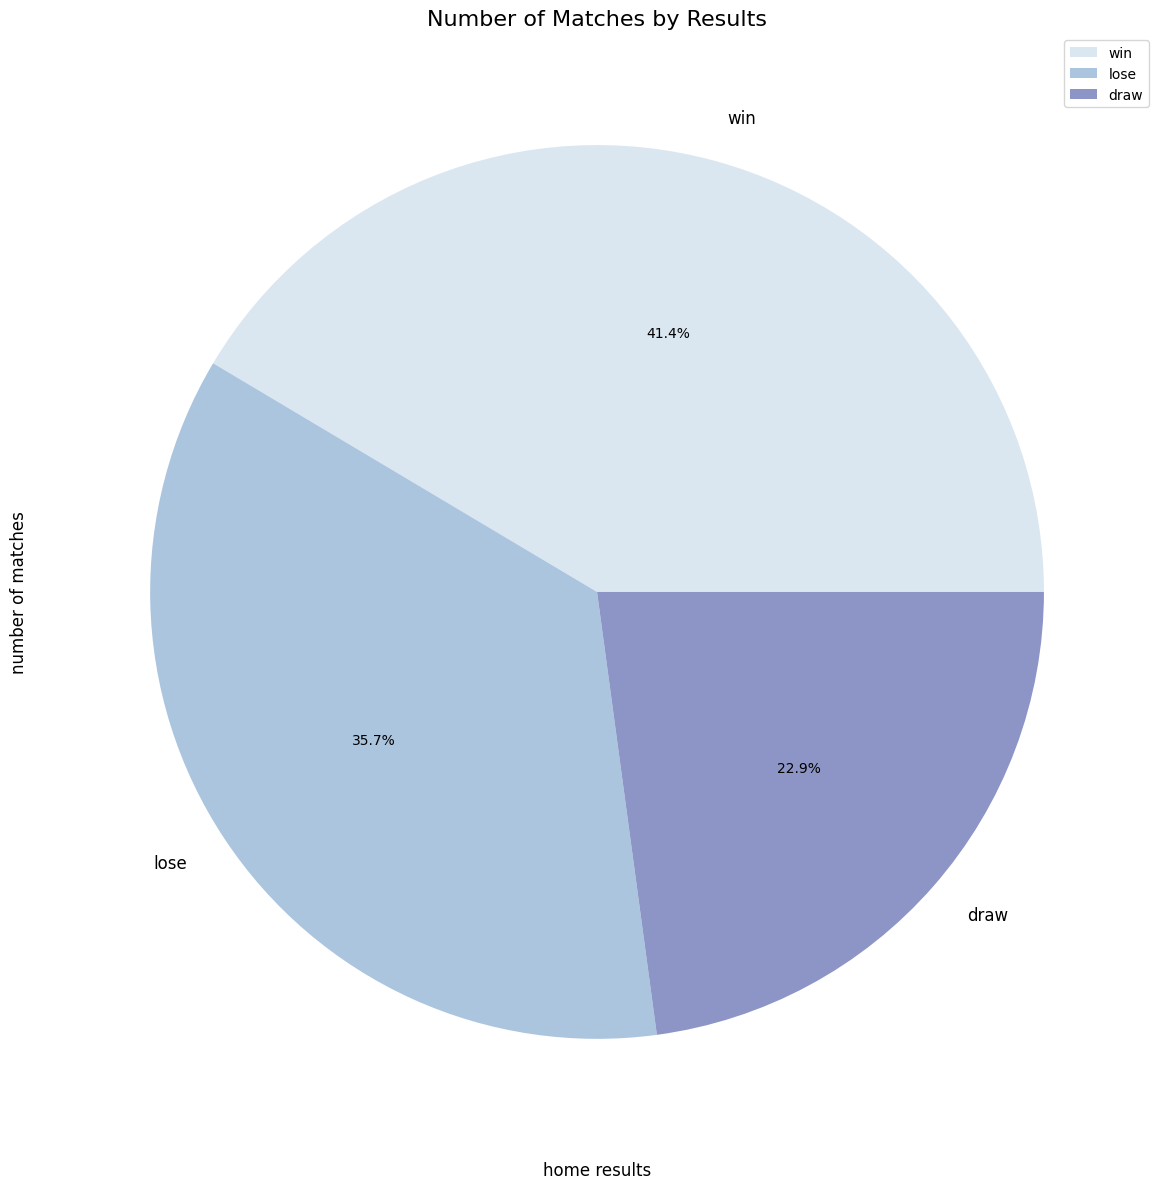

In [23]:
# Matches by results (win/draw/lose)
colors = plt.cm.BuPu(np.linspace(0.15, 0.5, 3))
ax = df_match['home_result'].value_counts().plot(kind='pie', figsize=(15, 12), 
                                                 colors=colors, autopct='%1.1f%%')

ax.set_title('Number of Matches by Results', size=16)
ax.set_xlabel('home results', size=12)
ax.set_ylabel('number of matches', size=12)
ax.legend()
plt.xticks(rotation=0)
plt.tight_layout()
save_fig("match_by_resutls")

## 4 - Match Data with Player Performance
This section is executed after `04_modelling` finds its best models, especially with ones describing feature importances.

In [27]:
# Setup to save/load the model
import joblib
def save_model(model, id_):
    print("Saving model", id_)
    joblib.dump(model, os.path.join(NOTE_ROOT_DIR, "models", id_ + ".pkl"))
def load_model(id_):
    print("Loading model", id_)
    return joblib.load(os.path.join(NOTE_ROOT_DIR, "models", id_ + ".pkl"))

In [18]:
# Load the integrated data (full player features)
df_integrate = pd.read_csv(os.path.join(PRJ_ROOT_DIR, "data", "tabular", "integrate", "matches.csv"))
df_integrate = df_integrate.replace(-100, 0)
df_integrate.head()

,home_result,season,defence/clean_sheets_0,defence/goals_conceded_0,defence/tackles_0,defence/tackle_success_%_0,defence/last_man_tackles_0,defence/blocked_shots_0,defence/interceptions_0,defence/clearances_0,...,goalkeeping/catches_26,goalkeeping/sweeper_clearances_26,goalkeeping/throw_outs_26,goalkeeping/goal_kicks_26,defence/recoveries_26,defence/duels_won_26,defence/duels_lost_26,teamplay/passes_26,teamplay/crosses_26,teamplay/accurate_long_balls_26
0,lose,2019/20,5.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1097.0,88.0,0.0
1,win,2019/20,6.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,win,2019/20,13.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,win,2019/20,11.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,248.0,13.0,0.0
4,win,2019/20,13.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4.1 - Univariate Analysis

Saving figure integrate_histogram_plots


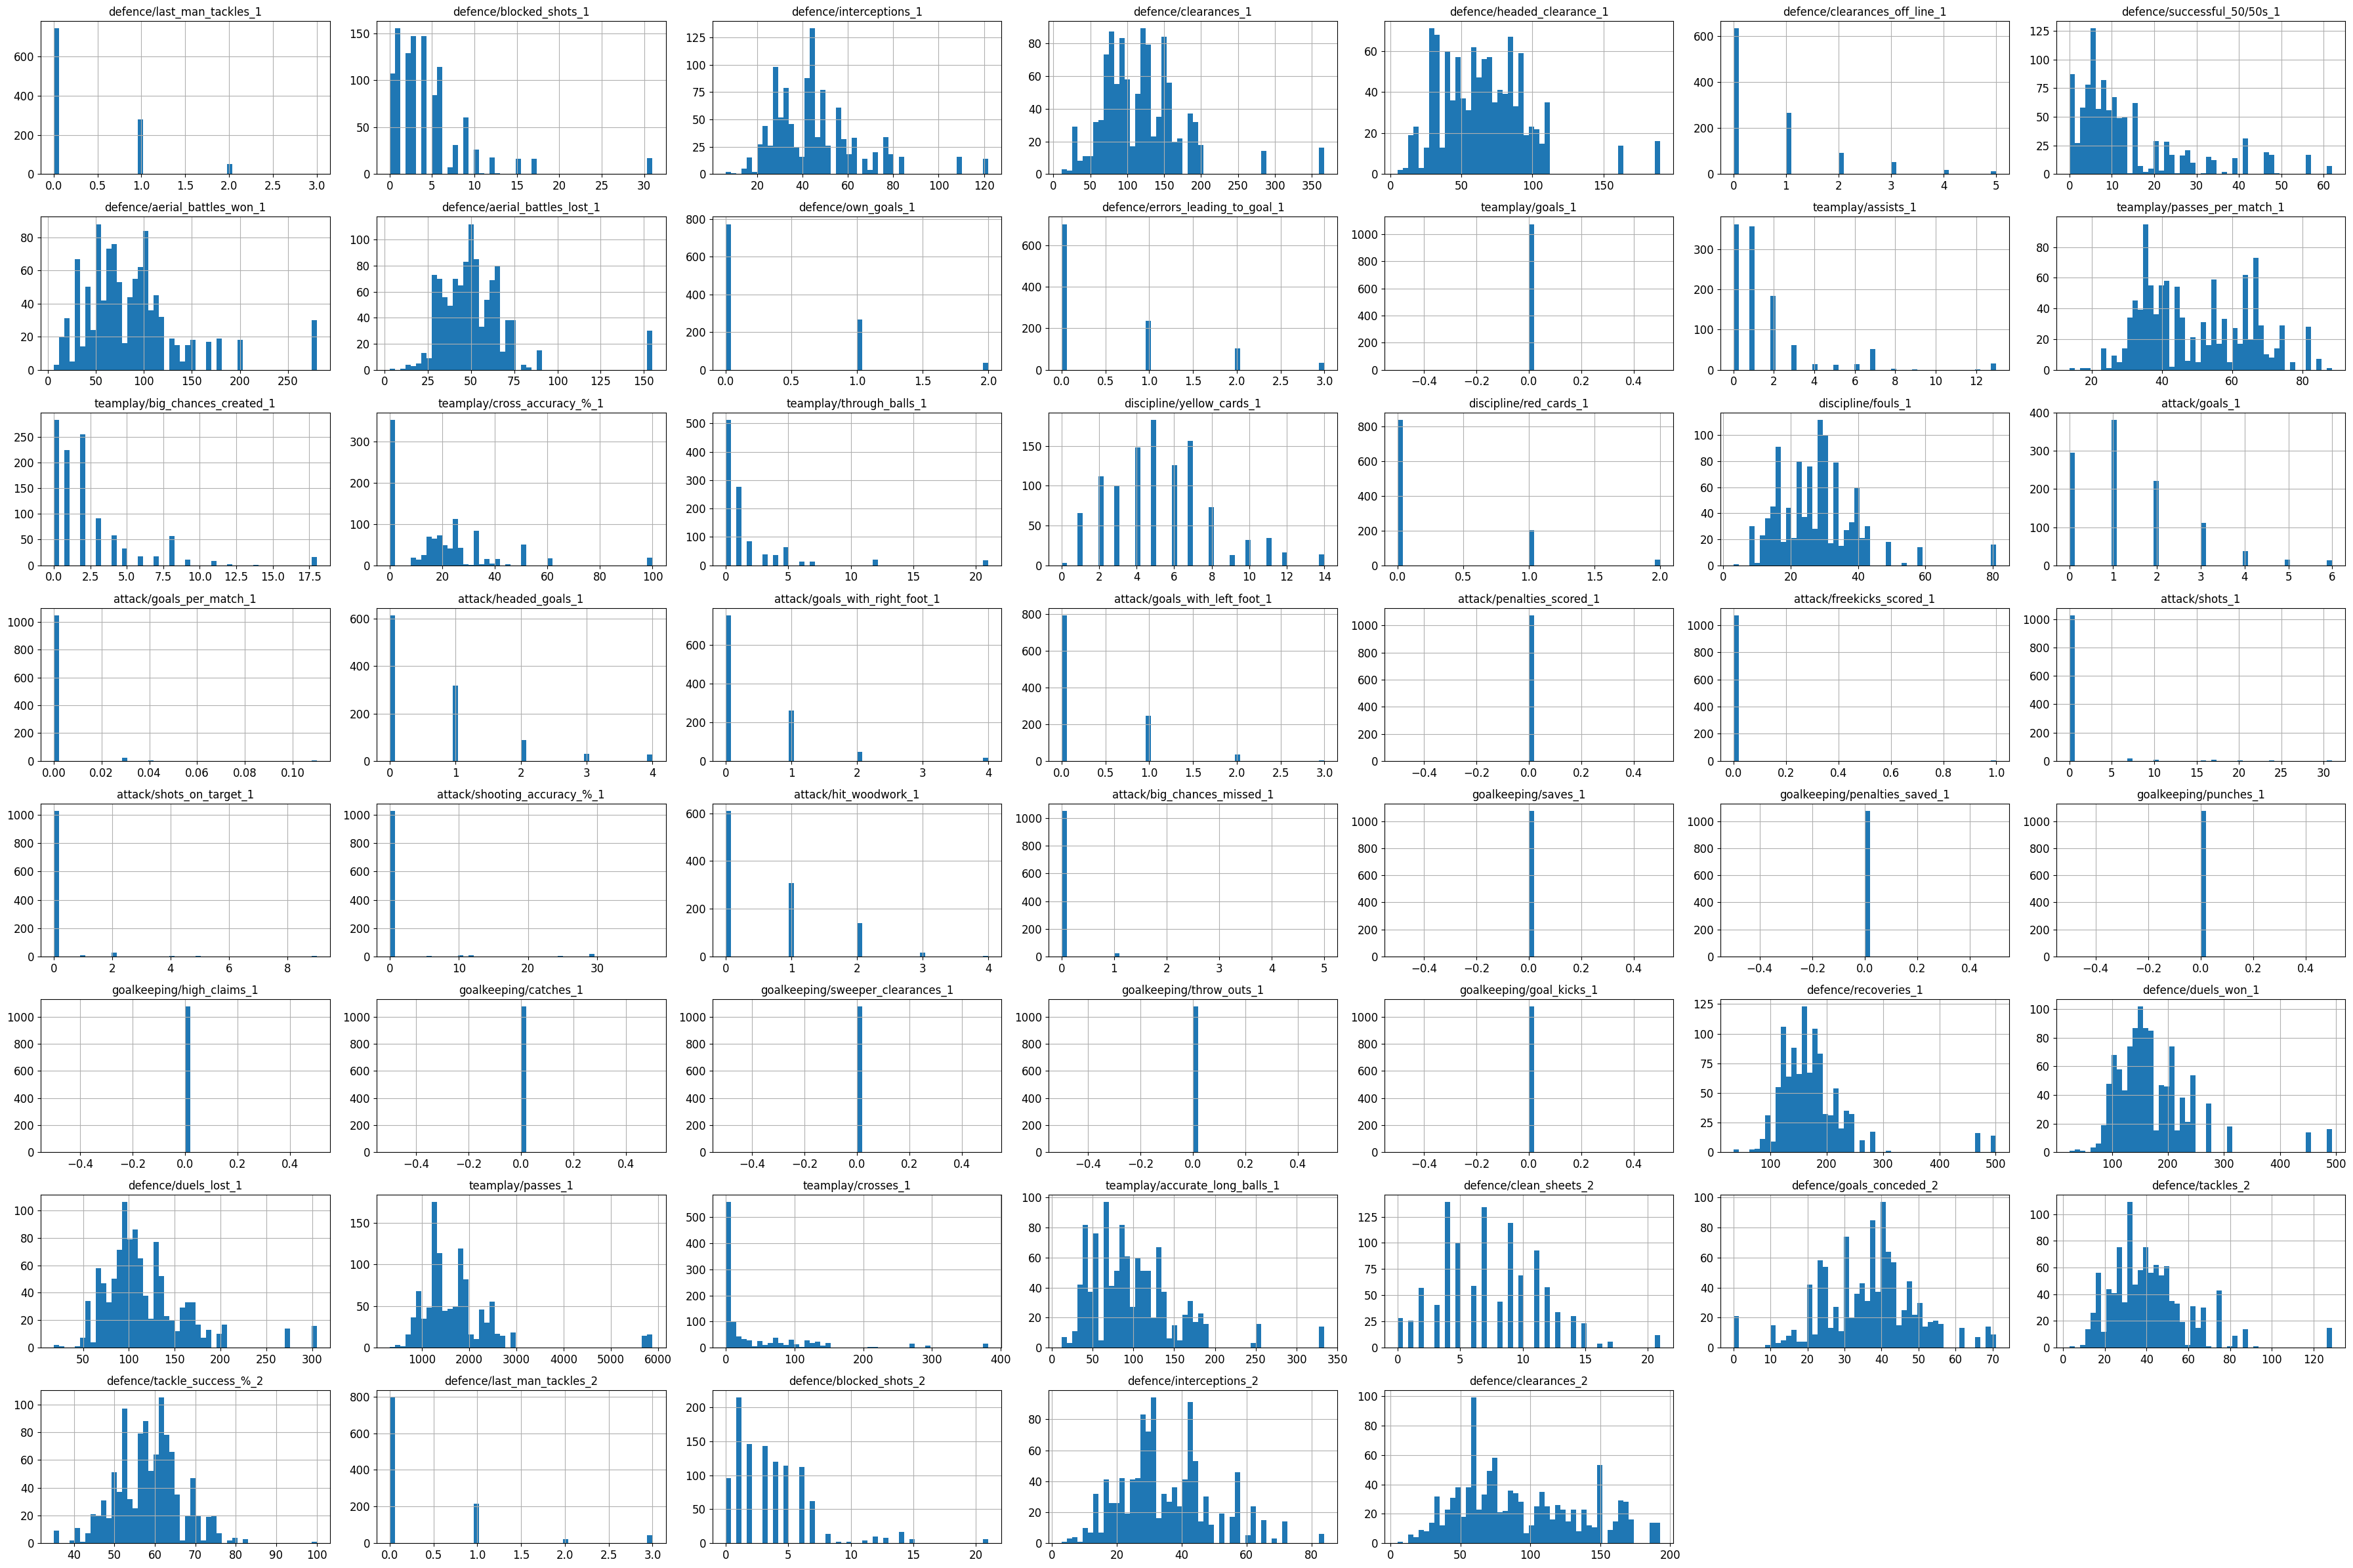

In [19]:
# Histogram of numerical variables
df_integrate.iloc[:, 56:110].hist(bins=50, figsize=(36, 24))
save_fig("integrate_histogram_plots")

**NOTE:** The data itself seems to have a good-looking distribution (exclude out-of-position features), being not too skew to the both sides of the figures. It also suggests that `defender_0` players (defender with the highest average performance) may have many different playing styles.

### 4.2 - Multivariate Analysis
**NOTE:** We will evaluate the correlation between each feature and the label, which will reveal the impacts of positions to  match result, in our opinion. Then, null hypothesies are set to verify whether the impacts is visiable or not, with ANOVA test.

In [28]:
# Load the best model - Random forest
forest_bayes_search = load_model("forest_bayes_search")
feat_inds = np.where(forest_bayes_search.feature_importances_ > 0.0)[0]
len(feat_inds)

Loading model forest_bayes_search


768

Saving figure top30_feats_to_matches


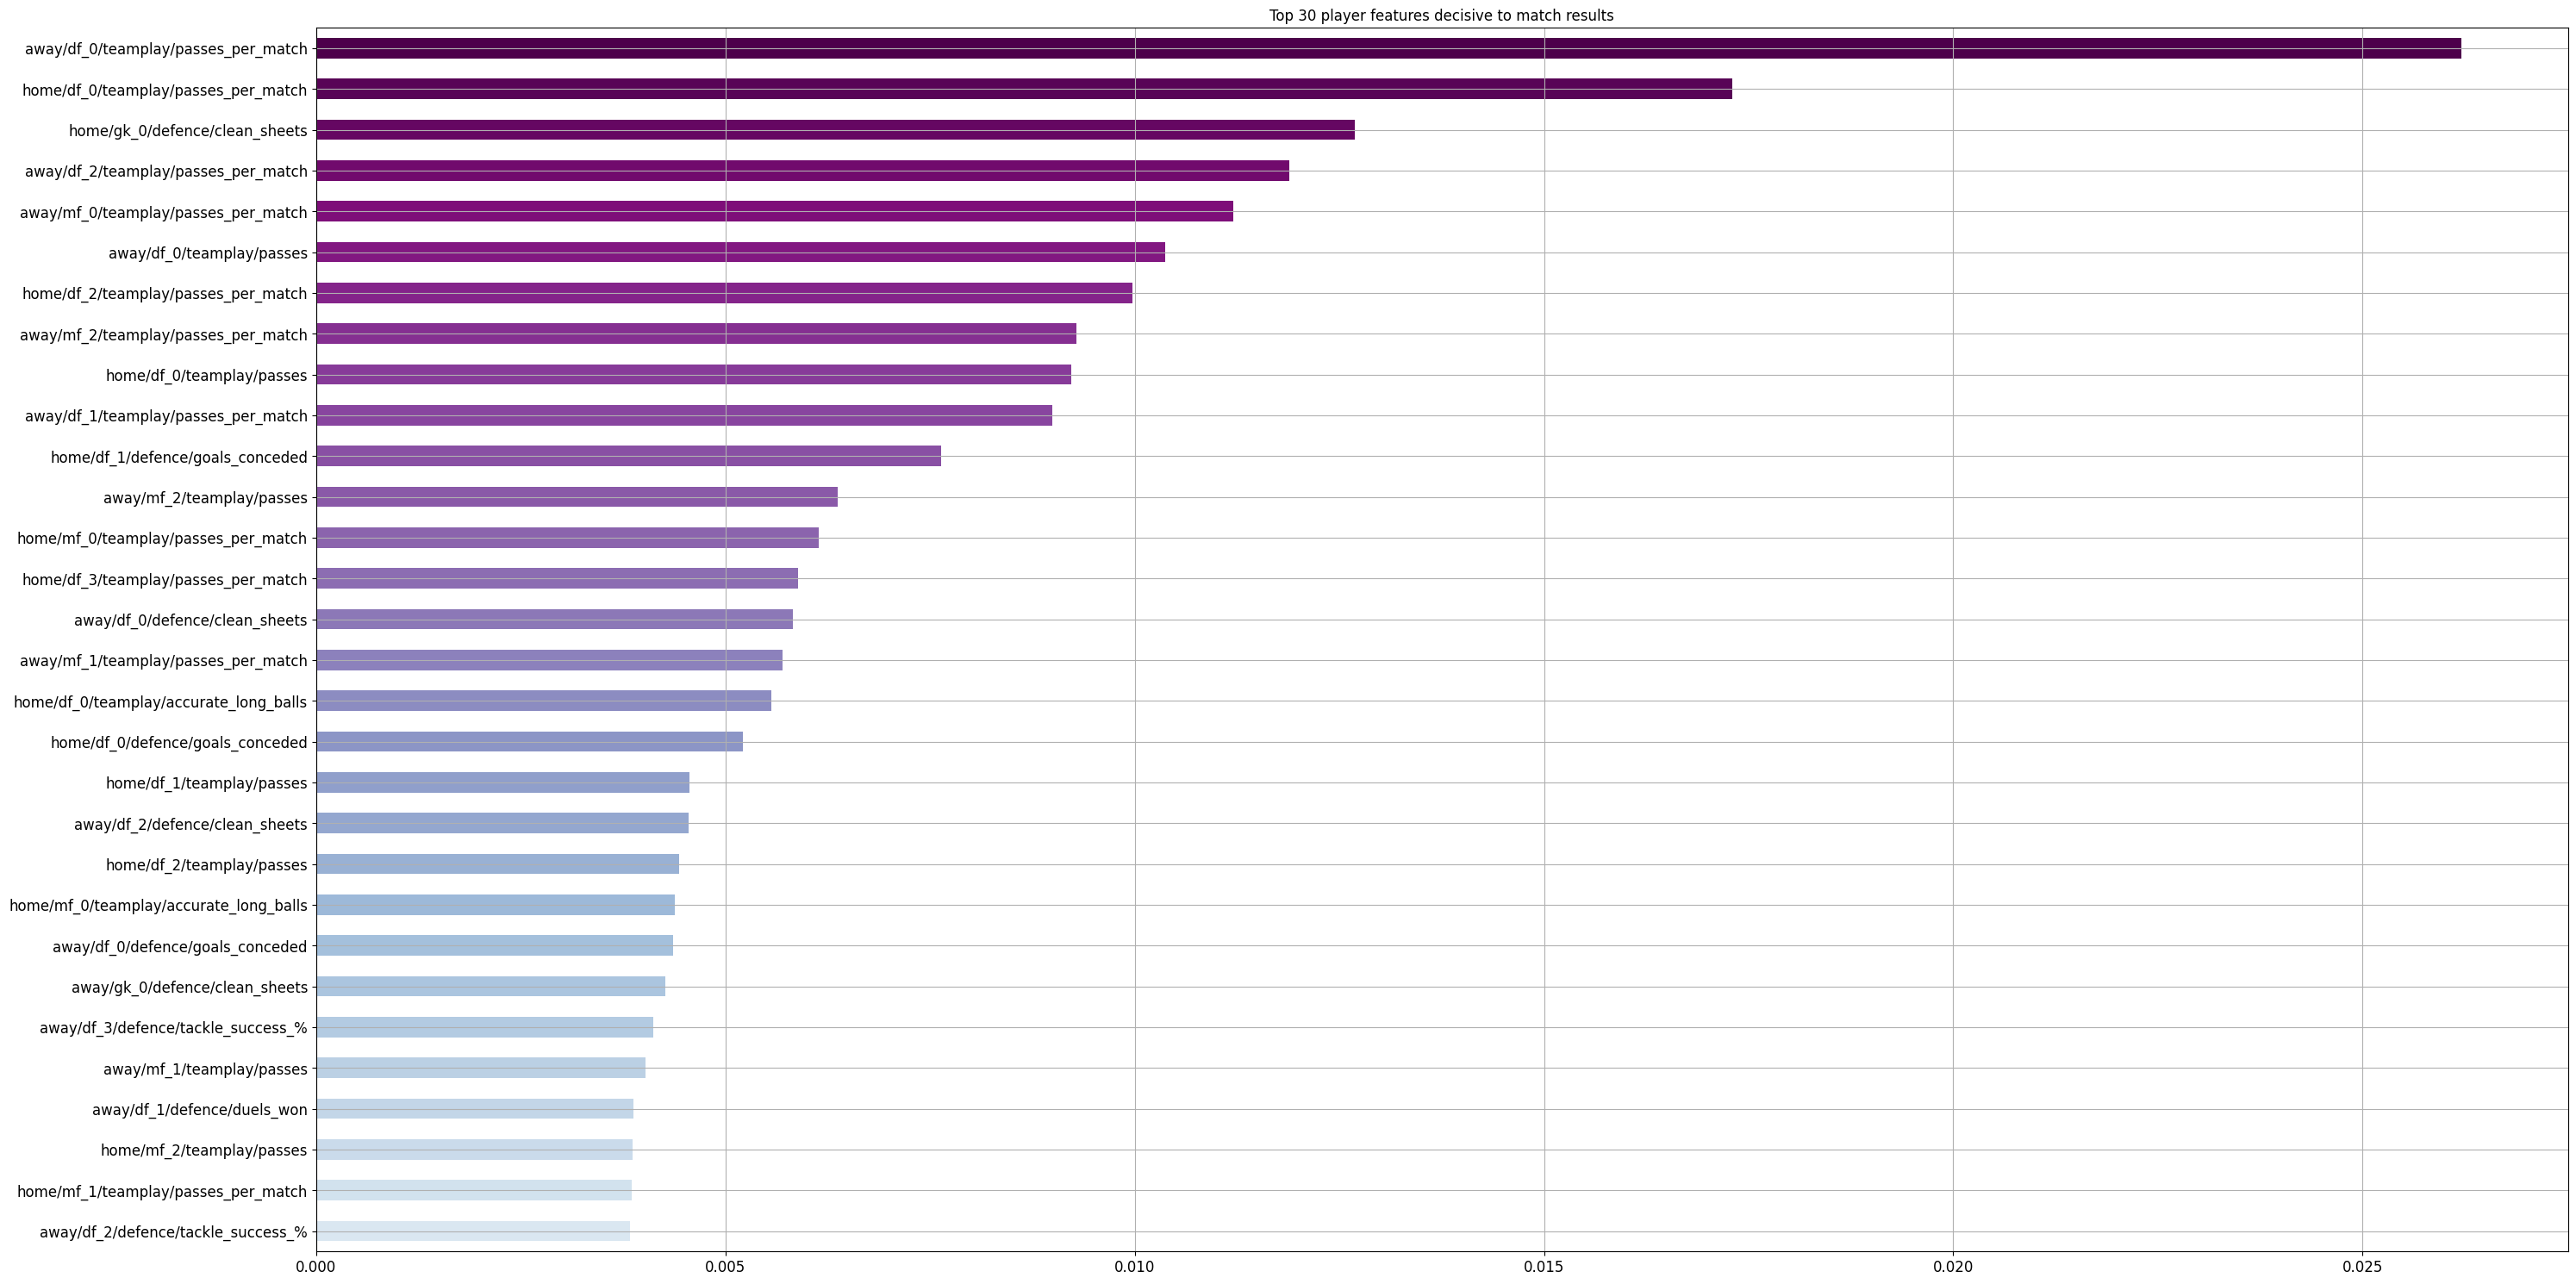

In [56]:
# Top 30 features of positions contributing the most to match result
titles = ['home/gk_0', 'home/df_0', 'home/df_1', 'home/df_2', 'home/df_3',
          'home/df_4', 'home/mf_0', 'home/mf_1', 'home/mf_2', 'home/mf_3',
          'home/mf_4', 'home/fw_0', 'home/fw_1', 'home/fw_2', 'away/gk_0',
          'away/df_0', 'away/df_1', 'away/df_2', 'away/df_3', 'away/mf_0',
          'away/mf_1', 'away/mf_2', 'away/mf_3', 'away/mf_4', 'away/fw_0',
          'away/fw_1', 'away/fw_2']
top_feats = df_integrate.iloc[:, 2:].columns
labels = []
for feat in top_feats:
    pos = feat.split("_")[-1]
    feat = "_".join(feat.split("_")[:-1])
    label = "/".join([titles[int(pos)], feat])
    labels.append(label)

df_feat_importances = pd.Series(forest_bayes_search.feature_importances_, index=labels).sort_values(ascending=False)
df_top_feats = df_feat_importances.head(30)
colors = plt.cm.BuPu(np.linspace(0.15, 1, 30))
df_top_feats.sort_values().plot.barh(figsize=(30, 15), grid=True,
                                     color=colors, title="Top 30 player features decisive to match results")
save_fig("top30_feats_to_matches")

#### Position Importances

Saving figure positions_to_matches


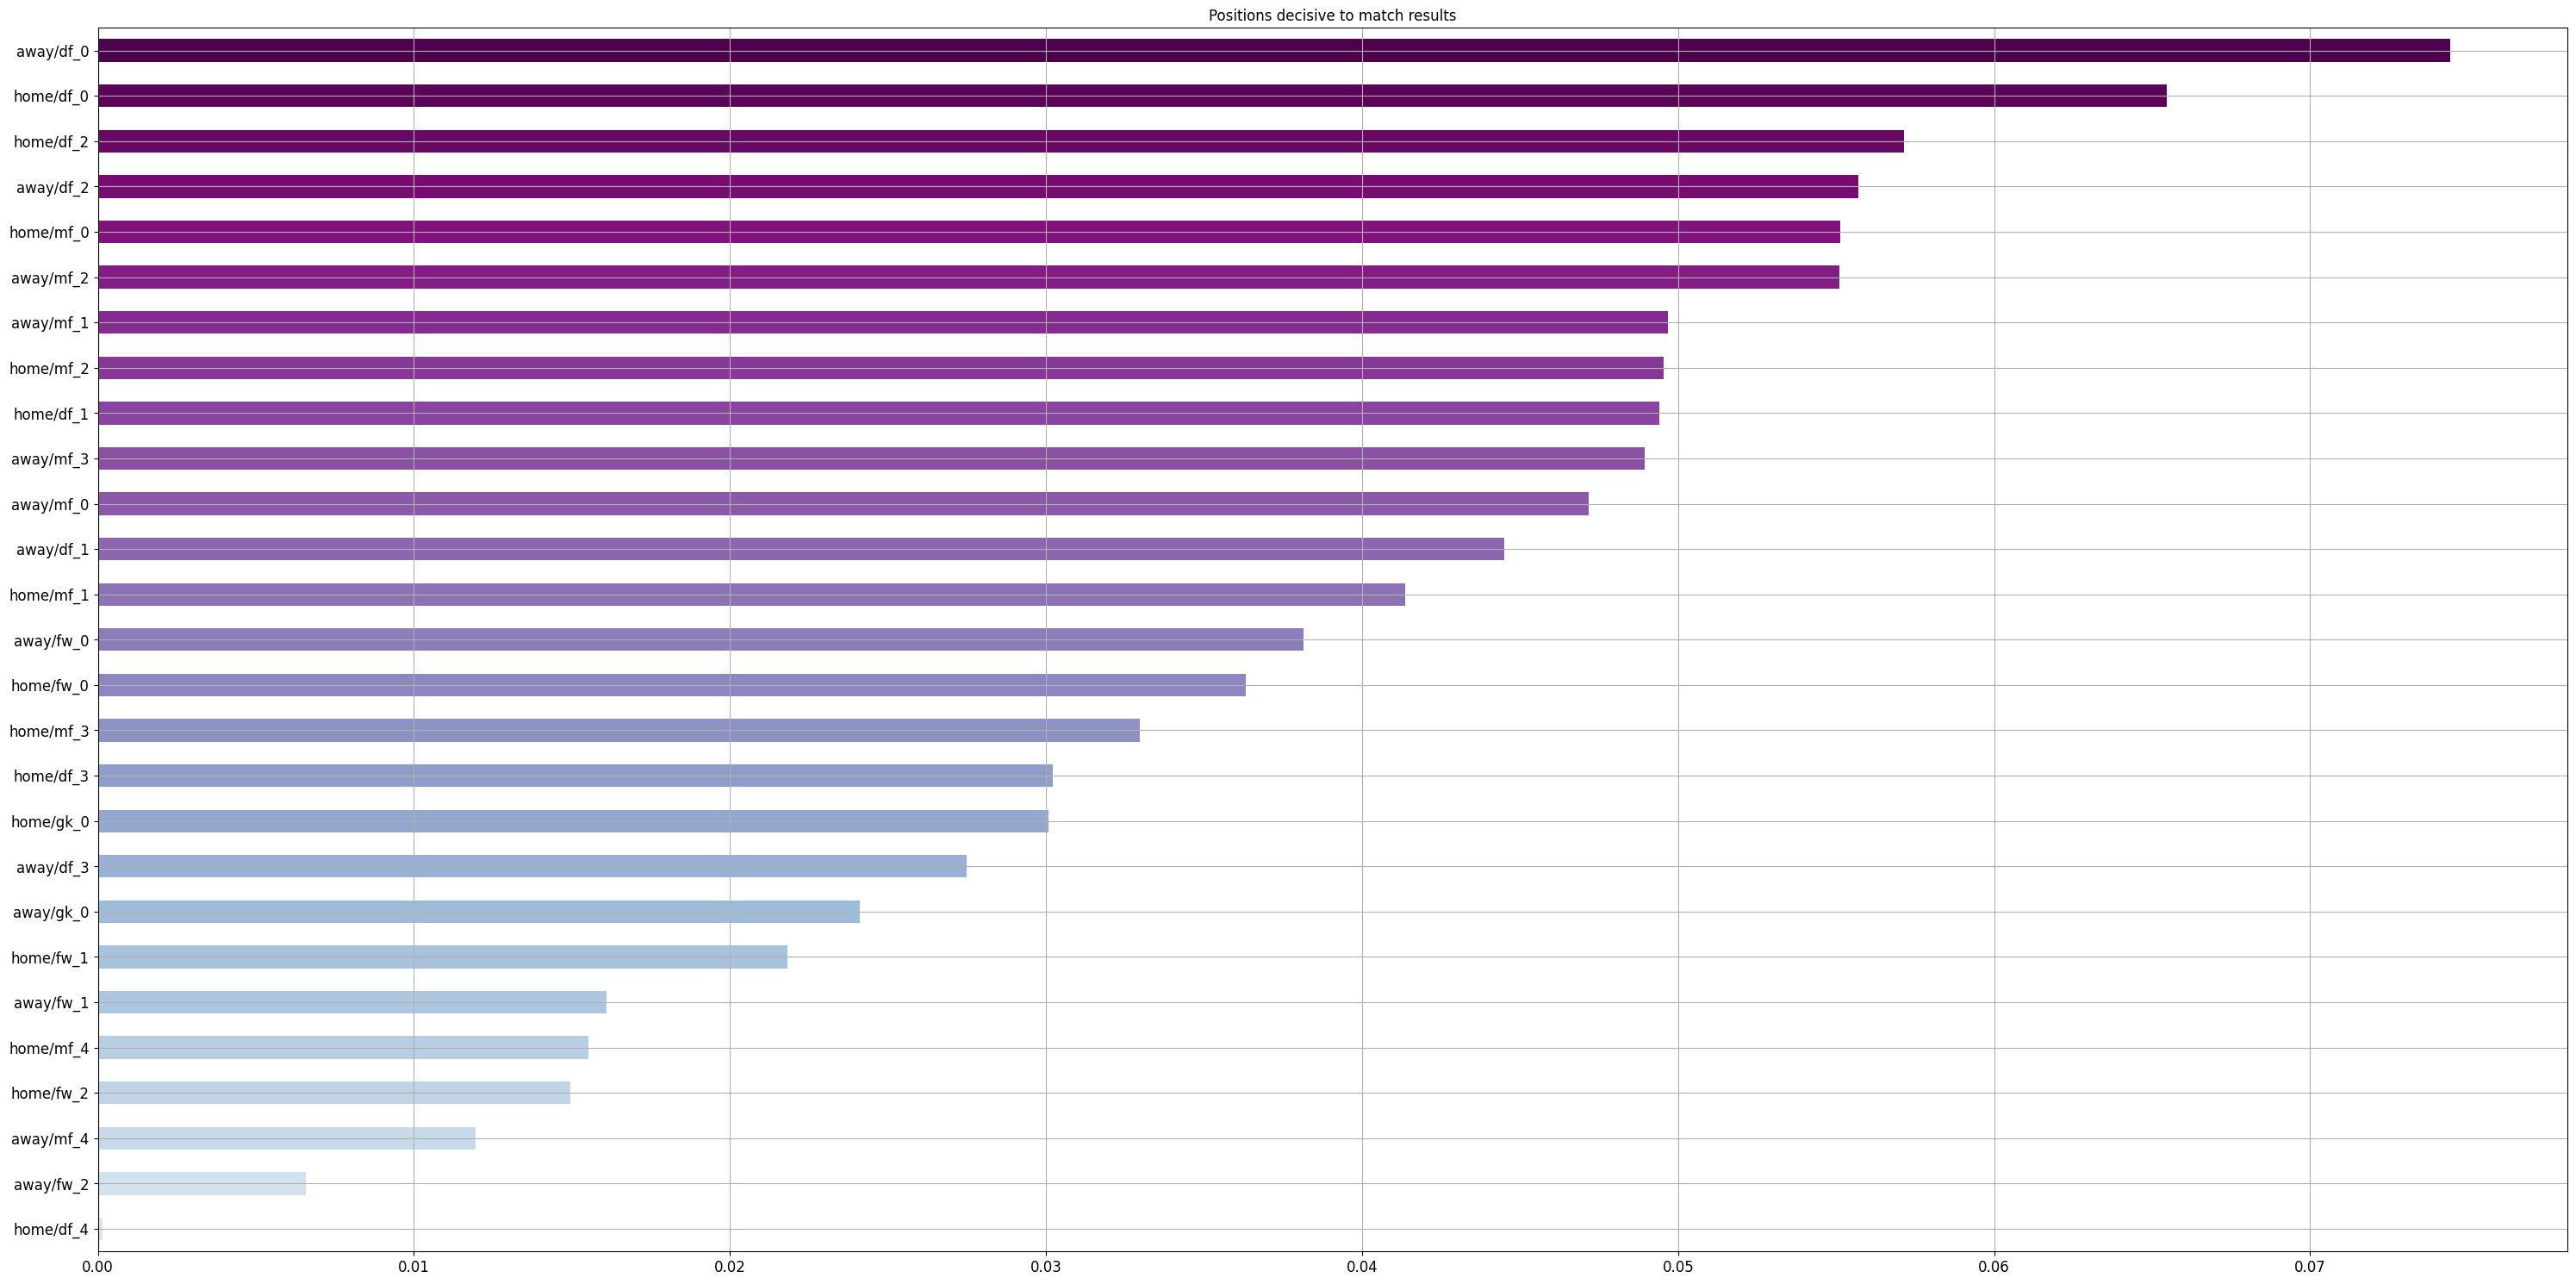

In [61]:
# The importance of positions
feats = df_feat_importances.index.tolist()
summary_positions = defaultdict(int)
for feat in feats:
    pos = "/".join(feat.split("/")[:2])
    summary_positions[pos] += df_feat_importances[feat]
    
colors = plt.cm.BuPu(np.linspace(0.15, 1, 27))
pd.Series(summary_positions).sort_values().plot.barh(figsize=(30, 15), grid=True,
                                               color=colors, title="Positions decisive to match results")
save_fig("positions_to_matches")

#### Performance Importances

Saving figure feats_to_matches


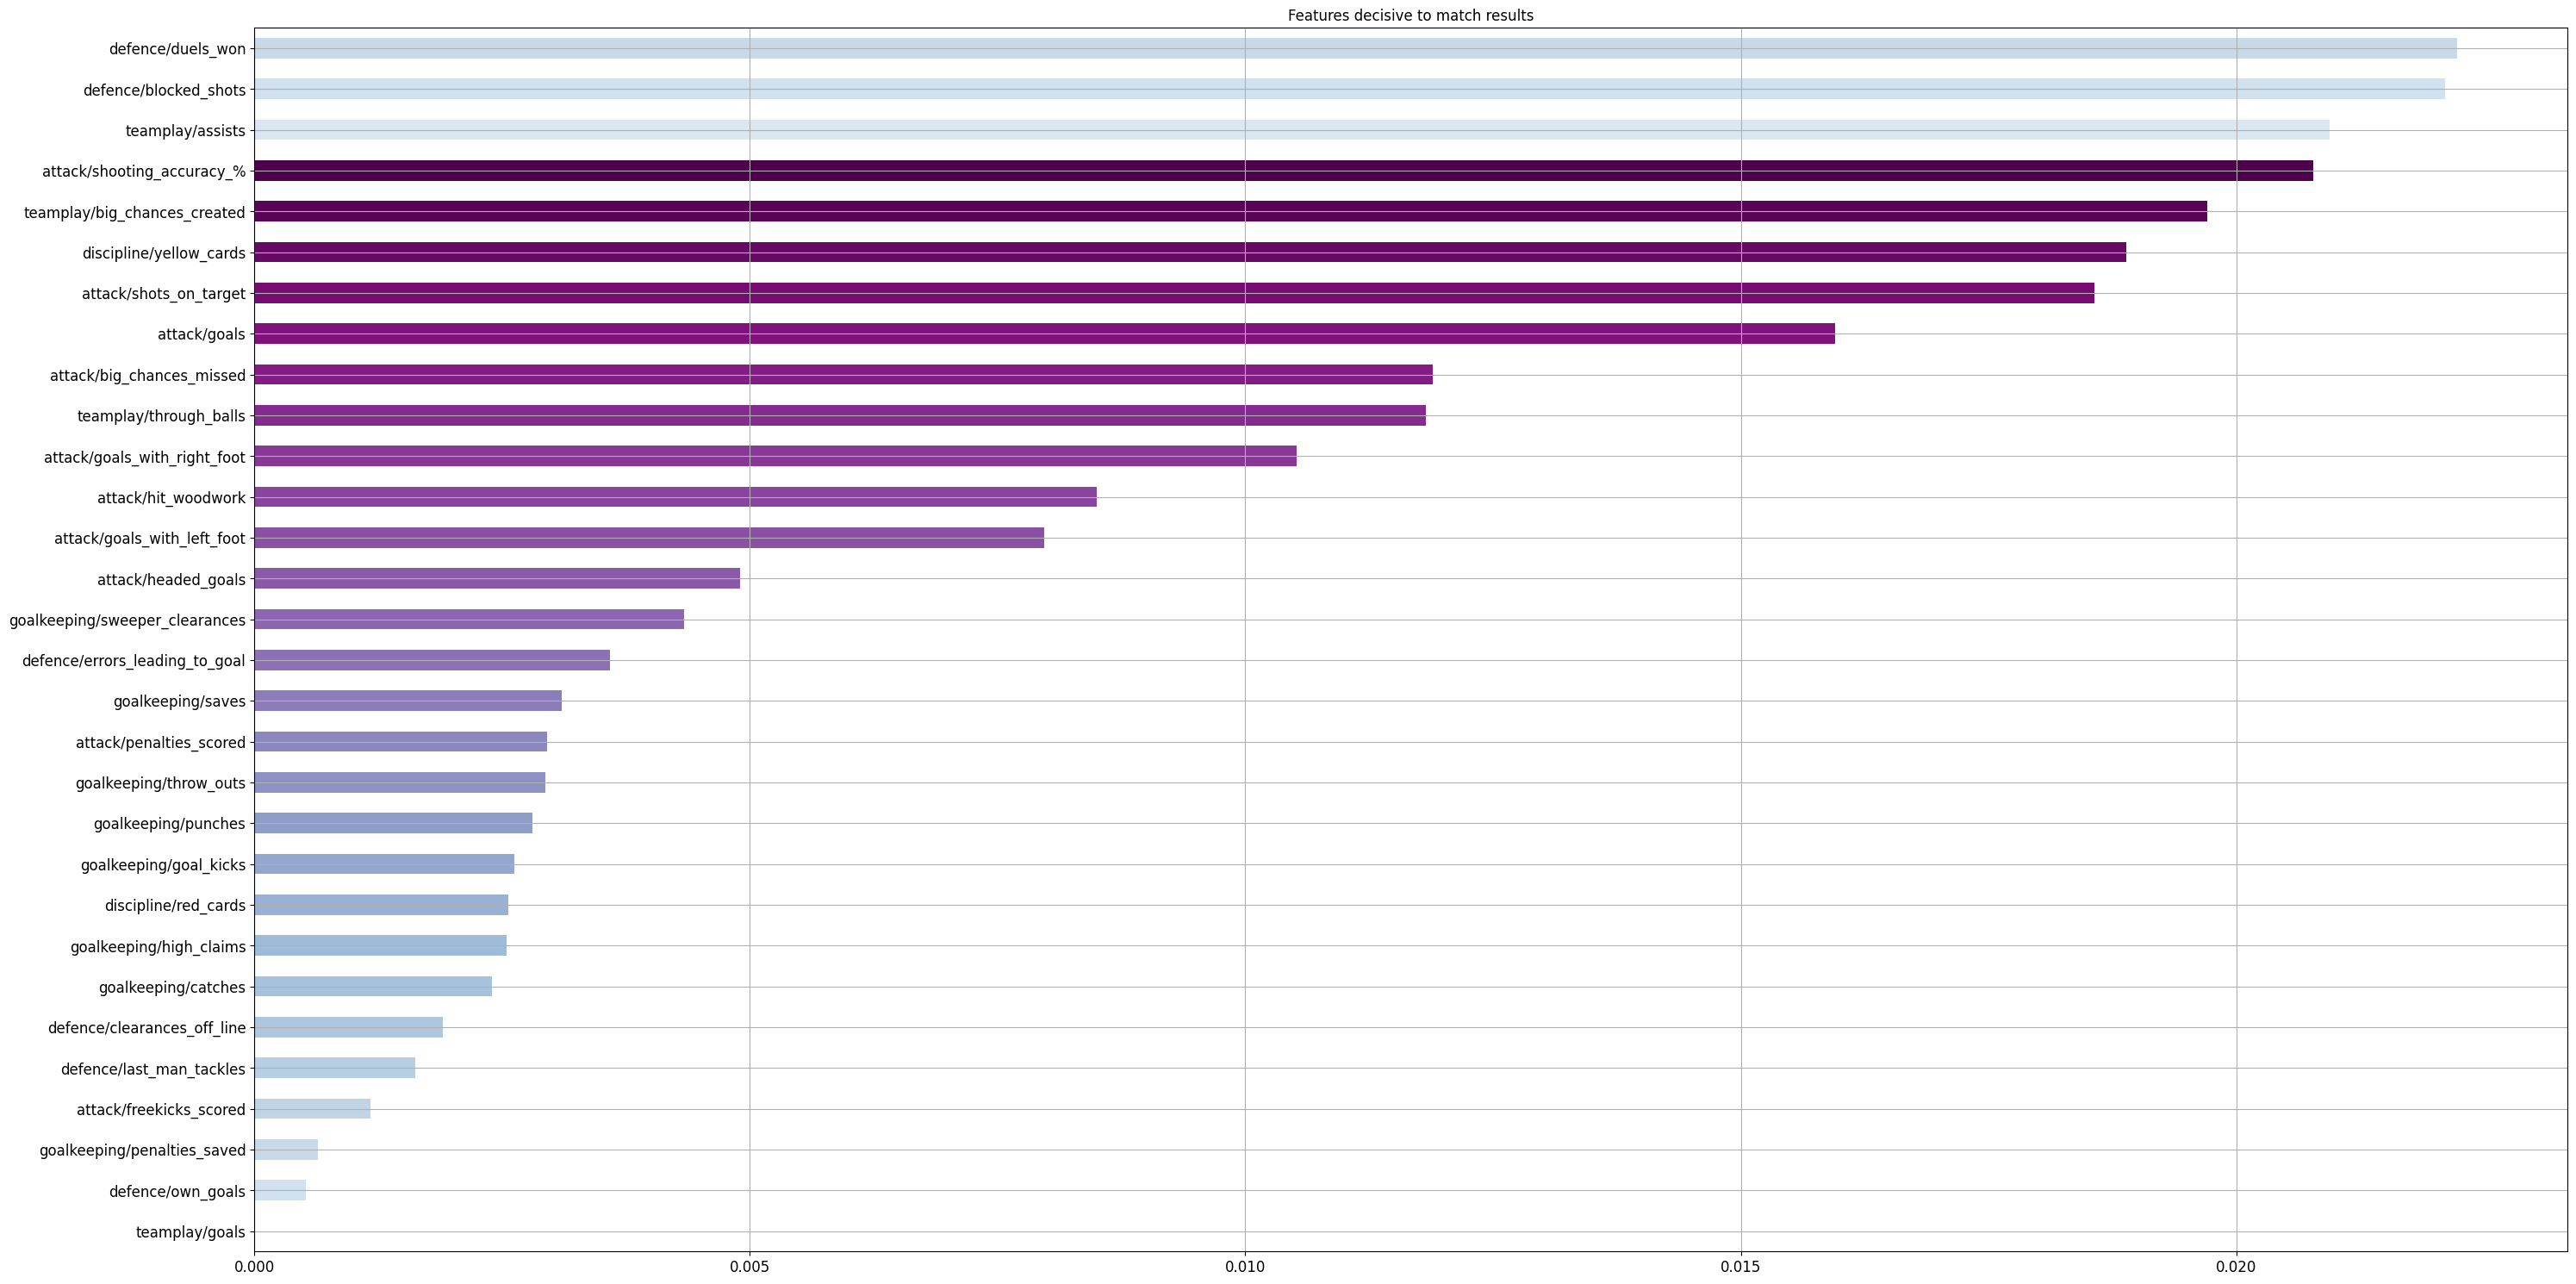

In [62]:
# The importance of performance indices
feats = df_feat_importances.index.tolist()
summary_perf = defaultdict(int)
for feat in feats:
    perf = "/".join(feat.split("/")[2:])
    summary_perf[perf] += df_feat_importances[feat]

colors = plt.cm.BuPu(np.linspace(0.15, 1, 27))
pd.Series(summary_perf).sort_values().head(30).plot.barh(figsize=(30, 15), grid=True,
                                                         color=colors, title="Features decisive to match results")
save_fig("feats_to_matches")

**NOTE:** Features related to goals (e.g., `big_chances_created`, `shots_on_target`,...) and denial of offensive balls contribute the most to the result of a match, which is intuitively understandable.

## 5 - Save the Work
**CAUTION:** If there is a change in the data that you intend to save, please change the path of the data, preventing unwanted and unofficial overwritten.

In [24]:
# Where to save dataframe
def save_df(df, path, extension="csv", index=False):
    df.to_csv(path, index=index)

### 5.1 - Data including All Features

In [25]:
# Save match data
save_df(df_match, os.path.join(PRJ_ROOT_DIR, "data", "tabular", "exploratory", "matches.csv"))

In [26]:
# Save player data with position
save_df(df_player_pos.dropna(), os.path.join(PRJ_ROOT_DIR, "data", "tabular", "exploratory", "players_with_position.csv"))

### 5.2 - Data with Dimensionality Reduction

In [27]:
# Reduce the original player data
player_pca = dim_reduce_95.transform(df_player.iloc[:, :-3])
df_player_pca = pd.DataFrame(player_pca)
df_player_pca[["id", "name", "season"]] = df_player[["id", "name", "season"]]
df_player_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,id,name,season
0,-2.612133,-0.488545,-0.134517,0.156764,0.396208,0.264956,-0.161856,-0.013893,0.003026,0.153815,...,0.09946,0.039522,-0.040506,-0.087925,-0.001491,-0.051950,-0.022051,468236.0,Yan Couto,2021/22
1,-2.612133,-0.488545,-0.134517,0.156764,0.396208,0.264956,-0.161856,-0.013893,0.003026,0.153815,...,0.09946,0.039522,-0.040506,-0.087925,-0.001491,-0.051950,-0.022051,447880.0,Josh Wilson-Esbrand,2021/22
2,2.786008,-2.530561,1.290737,-0.903387,-1.727806,0.234442,-0.177997,0.097806,-0.064383,-0.414472,...,-0.57603,-0.937056,-1.586245,0.703667,0.055061,-0.204782,-0.494550,216646.0,Yoane Wissa,2021/22
3,-2.612133,-0.488545,-0.134517,0.156764,0.396208,0.264956,-0.161856,-0.013893,0.003026,0.153815,...,0.09946,0.039522,-0.040506,-0.087925,-0.001491,-0.051950,-0.022051,491556.0,Charlie Whitaker,2021/22
4,-2.612133,-0.488545,-0.134517,0.156764,0.396208,0.264956,-0.161856,-0.013893,0.003026,0.153815,...,0.09946,0.039522,-0.040506,-0.087925,-0.001491,-0.051950,-0.022051,515503.0,Jack Wells-Morrison,2021/22


In [28]:
# Save player data
save_df(df_player_pca, os.path.join(PRJ_ROOT_DIR, "data", "tabular", "exploratory", "players_pca.csv"))